# VGG-19-Facial-Emotion-Recognition


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# Define the directories containing the train and test images
train_dir = "D:\\ALL DATASET\\emotions\\train"
test_dir = "D:\\ALL DATASET\\emotions\\test"

# Define the image data generator for preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the train and test datasets using the image data generators
train_data = train_datagen.flow_from_directory(train_dir, target_size=(48,48), color_mode='grayscale', batch_size=64, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(48,48), color_mode='grayscale', batch_size=64, class_mode='categorical')

# Define the VGG19 model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

 
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, beta_1=0.9), metrics=['accuracy'])

# Train the model on the dataset
model.fit(train_data, epochs=3, validation_data=test_data)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/3


C:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 582s 1s/step - accuracy: 0.2441 - loss: 1.8304 - val_accuracy: 0.2471 - val_loss: 1.8146
Epoch 2/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 564s 1s/step - accuracy: 0.2824 - loss: 1.7538 - val_accuracy: 0.4126 - val_loss: 1.4882
Epoch 3/3
449/449 ━━━━━━━━━━━━━━━━━━━━ 592s 1s/step - accuracy: 0.4156 - loss: 1.4520 - val_accuracy: 0.4557 - val_loss: 1.3848


### Saving the model

In [ ]:
model.save('vgg19_epoch3.h5')

113/113 ━━━━━━━━━━━━━━━━━━━━ 24s 208ms/step


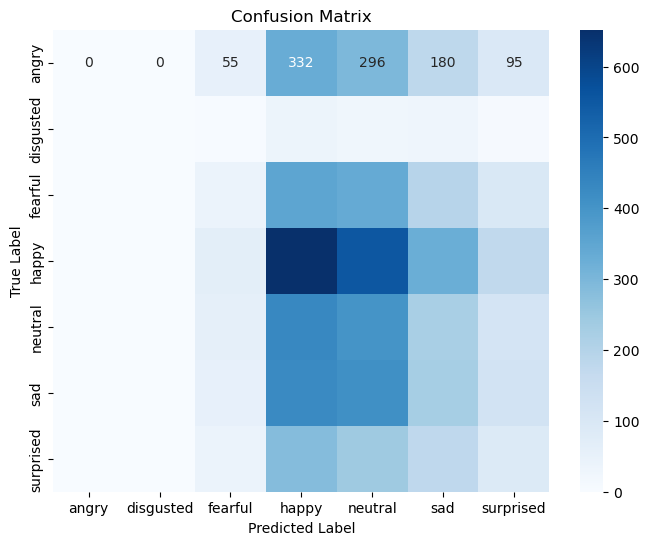

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# After training the model
predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=test_data.class_indices, yticklabels=test_data.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()